In [4]:
# backend = 'onnxruntime'
backend = 'sklearn'
# backend = 'sql_duckdb'
# backend = 'lleaves'
# backend = 'treelite'

model = 'nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517'

if backend == 'onnxruntime':
    result_file = 'result.csv'
else:
    result_file = f'result_{backend}.csv'

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
147,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,0,0.000000,nyc-taxi-green-dec-2016,1G,1,1.158803
148,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,1,0.718411,nyc-taxi-green-dec-2016,1G,1,0.827496
149,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,2,0.718411,nyc-taxi-green-dec-2016,1G,1,0.527467
150,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,1,0.828363,nyc-taxi-green-dec-2016,1G,1,0.914843
151,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,2,0.828363,nyc-taxi-green-dec-2016,1G,1,0.635756
152,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,1,0.938315,nyc-taxi-green-dec-2016,1G,1,0.919742
153,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,2,0.938315,nyc-taxi-green-dec-2016,1G,1,0.636887
154,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,1,1.048267,nyc-taxi-green-dec-2016,1G,1,0.643844
155,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,2,1.048267,nyc-taxi-green-dec-2016,1G,1,0.644096
156,nyc-taxi-green-dec-2016_d3_l8_n15_20241105114517,1,1.158219,nyc-taxi-green-dec-2016,1G,1,0.645550


In [6]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 1.191810889365661)

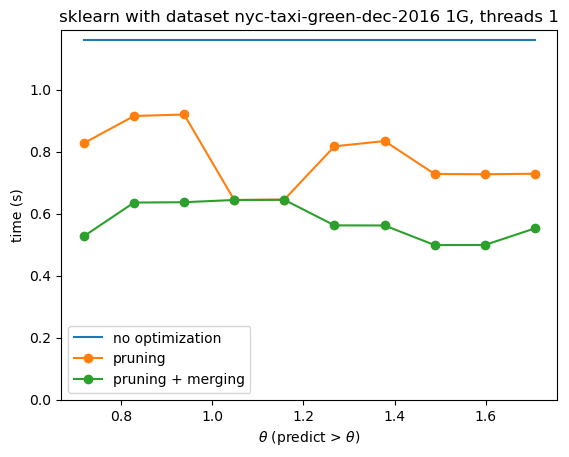

In [7]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='no optimization')
plt.plot(x, y1, marker='o', label='pruning')
# plt.bar(x, y1, width=0.1, label='pruning')
if len(y2) > 0:
    # x2 = [e + 0.1 for e in x]
    plt.plot(x, y2, marker='o', label='pruning + merging')
    # plt.bar(x2, y2, width=0.1, label='pruning + merging')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 1.2167436301990164)

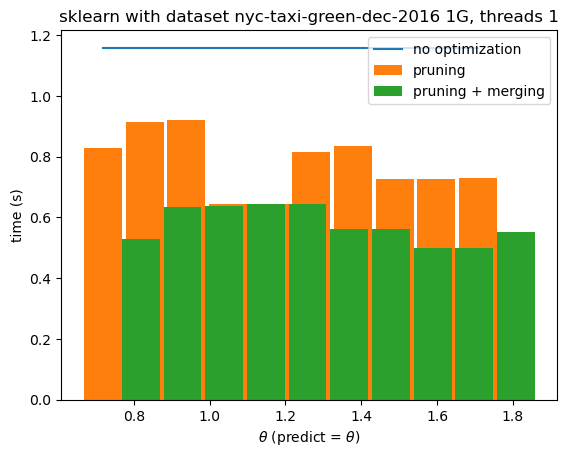

In [8]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='no optimization', color='tab:blue')
# plt.plot(x, y1, marker='o', label='pruning')
plt.bar(x, y1, width=0.1, label='pruning', color='tab:orange')
if len(y2) > 0:
    x2 = [e + 0.1 for e in x]
    # plt.plot(x, y2, marker='o', label='pruning + merging')
    plt.bar(x2, y2, width=0.1, label='pruning + merging', color='tab:green')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
# plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.xlabel('$\\theta$ (predict = $\\theta$)')
plt.legend(loc='upper right')
plt.ylim(0)

(0.0, 2.3900518946782356)

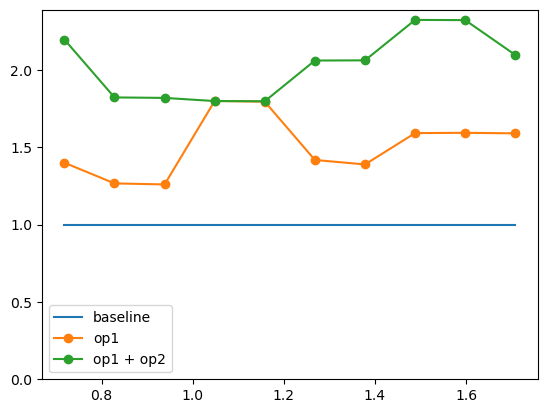

In [9]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)